In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
test = pd.read_csv('~/Desktop/interview-prep/ab-testing/test_group.csv', sep = ";")
control = pd.read_csv('~/Desktop/interview-prep/ab-testing/control_group.csv', sep = ";")

In [3]:
test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [5]:
control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [19]:
ctrl_desc = control.describe().round(2)
print(ctrl_desc)

       Spend [USD]  # of Impressions      Reach  # of Website Clicks  \
count        30.00             29.00      29.00                29.00   
mean       2288.43         109559.76   88844.93              5320.79   
std         367.33          21688.92   21832.35              1757.37   
min        1757.00          71274.00   42859.00              2277.00   
25%        1945.50          92029.00   74192.00              4085.00   
50%        2299.50         113430.00   91579.00              5224.00   
75%        2532.00         121332.00  102479.00              6628.00   
max        3083.00         145248.00  127852.00              8137.00   

       # of Searches  # of View Content  # of Add to Cart  # of Purchase  
count          29.00              29.00             29.00          29.00  
mean         2221.31            1943.79           1300.00         522.79  
std           866.09             777.55            407.46         185.03  
min          1001.00             848.00            

In [20]:
test_desc = test.describe().round(2)
print(test_desc)

       Spend [USD]  # of Impressions      Reach  # of Website Clicks  \
count        30.00             30.00      30.00                30.00   
mean       2563.07          74584.80   53491.57              6032.33   
std         348.69          32121.38   28795.78              1708.57   
min        1968.00          22521.00   10598.00              3038.00   
25%        2324.50          47541.25   31516.25              4407.00   
50%        2584.00          68853.50   44219.50              6242.50   
75%        2836.25          99500.00   78778.75              7604.75   
max        3112.00         133771.00  109834.00              8264.00   

       # of Searches  # of View Content  # of Add to Cart  # of Purchase  
count          30.00              30.00             30.00          30.00  
mean         2418.97            1858.00            881.53         521.23  
std           388.74             597.65            347.58         211.05  
min          1854.00             858.00            

In [21]:
test_desc - ctrl_desc

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
mean,274.64,-34974.96,-35353.36,711.54,197.66,-85.79,-418.47,-1.56
std,-18.64,10432.46,6963.43,-48.80,-477.35,-179.90,-59.88,26.02
min,211.00,-48753.00,-32261.00,761.00,853.00,10.00,-164.00,16.00
25%,379.00,-44487.75,-42675.75,322.00,428.00,71.00,-347.50,-74.00
50%,284.50,-44576.50,-47359.50,1018.50,5.50,-103.00,-365.00,-1.00
75%,304.25,-21832.00,-23700.25,976.75,90.25,-9.00,-492.50,31.00
max,29.00,-11477.00,-18018.00,127.00,-1913.00,-1418.00,-522.00,90.00


In [22]:
control.isna().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64

In [23]:
test.isna().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [24]:
control = control.dropna()
control.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        29 non-null     object 
 1   Date                 29 non-null     object 
 2   Spend [USD]          29 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [28]:
control = control.rename(columns={'Campaign Name': 'campaign', 
                                  'Date': 'date', 
                                  'Spend [USD]': 'spend', 
                                  '# of Impressions': 'impressions', 
                                  'Reach': 'reach', 
                                  '# of Website Clicks': 'clicks', 
                                  '# of Searches': 'searches', 
                                  '# of View Content': 'views', 
                                  '# of Add to Cart': 'add_carts',
                                  '# of Purchase': 'purchases' 
                                  })

test = test.rename(columns={'Campaign Name': 'campaign', 
                                  'Date': 'date', 
                                  'Spend [USD]': 'spend', 
                                  '# of Impressions': 'impressions', 
                                  'Reach': 'reach', 
                                  '# of Website Clicks': 'clicks', 
                                  '# of Searches': 'searches', 
                                  '# of View Content': 'views', 
                                  '# of Add to Cart': 'add_carts',
                                  '# of Purchase': 'purchases' 
                                  })

control['cpa'] = control['purchases']/control['spend']
control['purchase_per_reach'] = control['purchases']/control['reach']
control['purchase_per_impr'] = control['purchases']/control['impressions']

test['cpa'] = test['purchases']/test['spend']
test['purchase_per_reach'] = test['purchases']/test['reach']
test['purchase_per_impr'] = test['purchases']/test['impressions']

In [29]:
# Dates present in one and not the other
test_only = set(test['date']) - set(control['date'])
ctrl_only = set(control['date']) - set(test['date'])
test_only, ctrl_only  # should be empty sets ideally

# See which rows have mismatched dates by joining
merged = test[['date']].merge(control[['date']], on='date', how='outer', indicator=True)
merged[merged['_merge'] != 'both']

,date,_merge
25,5.08.2019,left_only


In [30]:
test.groupby('date').size().sort_values(ascending=False).head()
control.groupby('date').size().sort_values(ascending=False).head()


date
1.08.2019     1
10.08.2019    1
11.08.2019    1
12.08.2019    1
13.08.2019    1
dtype: int64

In [34]:
for df in (test, control):
    df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

test_only = set(test['date']) - set(control['date'])
ctrl_only = set(control['date']) - set(test['date'])
test_only, ctrl_only


({Timestamp('2019-08-05 00:00:00')}, set())

In [35]:
common_dates = set(test['date']) & set(control['date'])
test_aligned = test[test['date'].isin(common_dates)].copy()
control_aligned = control[control['date'].isin(common_dates)].copy()


/var/folders/vz/g_x676v12rz6c2v010nn182m0000gn/T/ipykernel_75396/1028521207.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['control_aligned', 'test_aligned'])
/var/folders/vz/g_x676v12rz6c2v010nn182m0000gn/T/ipykernel_75396/1028521207.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['control_aligned', 'test_aligned'])


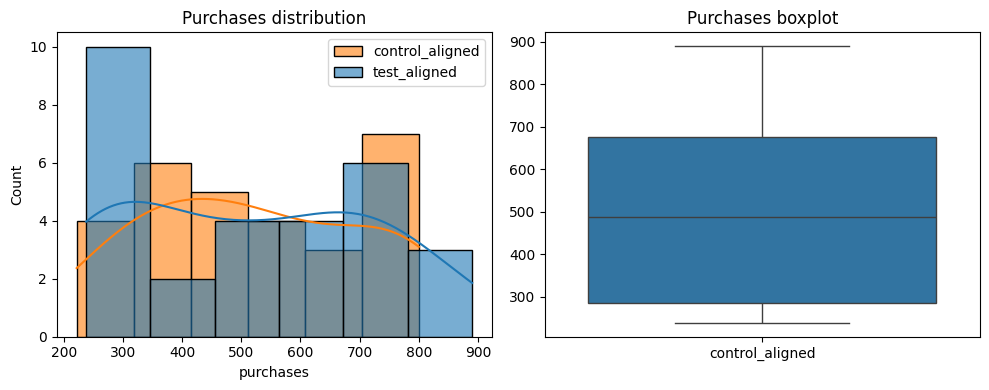

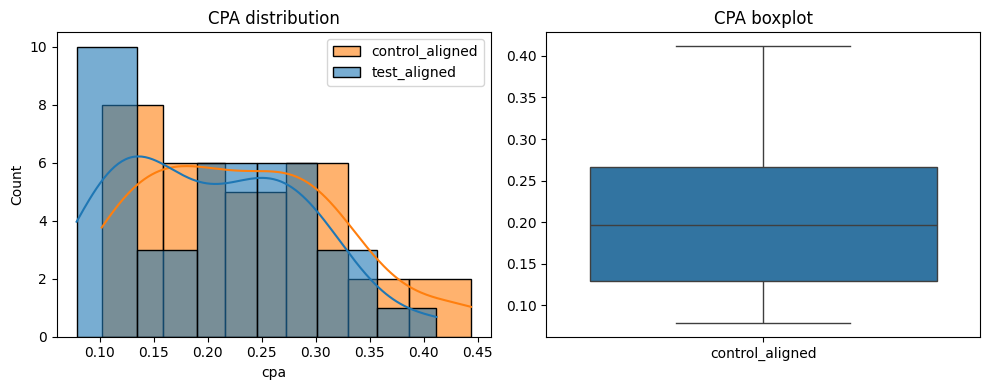

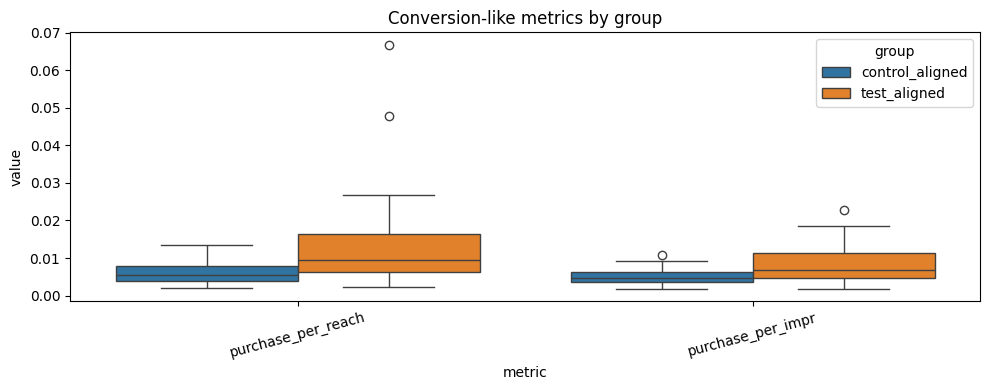

In [36]:
# Purchases
fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(control_aligned['purchases'], kde=True, color='tab:orange', label='control_aligned', ax=ax[0], alpha=0.6)
sns.histplot(test_aligned['purchases'], kde=True, color='tab:blue', label='test_aligned', ax=ax[0], alpha=0.6)
ax[0].legend()
ax[0].set_title('Purchases distribution')

sns.boxplot(data=[control_aligned['purchases'], test_aligned['purchases']], ax=ax[1])
ax[1].set_xticklabels(['control_aligned', 'test_aligned'])
ax[1].set_title('Purchases boxplot')
plt.tight_layout()

# CPA
fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(control_aligned['cpa'], kde=True, color='tab:orange', label='control_aligned', ax=ax[0], alpha=0.6)
sns.histplot(test_aligned['cpa'], kde=True, color='tab:blue', label='test_aligned', ax=ax[0], alpha=0.6)
ax[0].legend()
ax[0].set_title('CPA distribution')

sns.boxplot(data=[control_aligned['cpa'], test_aligned['cpa']], ax=ax[1])
ax[1].set_xticklabels(['control_aligned', 'test_aligned'])
ax[1].set_title('CPA boxplot')
plt.tight_layout()

# Conversion-like metrics
metrics = ['purchase_per_reach', 'purchase_per_impr']
df_plot = (
    pd.concat([control_aligned.assign(group='control_aligned'), test_aligned.assign(group='test_aligned')])[['group'] + metrics]
      .melt(id_vars='group', var_name='metric', value_name='value')
)

plt.figure(figsize=(10,4))
sns.boxplot(data=df_plot, x='metric', y='value', hue='group')
plt.title('Conversion-like metrics by group')
plt.xticks(rotation=15)
plt.tight_layout()
